In [1]:
from scipy.integrate import quad
from scipy.stats import expon
import numpy as np
import matplotlib.pyplot as plt

In [2]:

vi = 8 
vr = 25 
v0 = 50 
Pr = 200
lmbda = 0.05 

In [3]:

def pdf(v, lmbda):
    return lmbda * np.exp(-lmbda * v)

In [4]:

def power(v):
    if v < vi:
        return 0
    elif vi <= v < vr:
        return (v/vr)**3 * Pr
    elif vr <= v <= v0:
        return Pr
    else:
        return 0

In [5]:

E_P_v, _ = quad(lambda v: power(v) * pdf(v, lmbda), 0, np.inf)
E_v = 1 / lmbda

C:\Users\USER\AppData\Local\Temp\ipykernel_2780\1198850550.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  E_P_v, _ = quad(lambda v: power(v) * pdf(v, lmbda), 0, np.inf)


In [6]:
dist = expon(scale=1/lmbda)
P_E_v = 1 - dist.cdf(E_v)


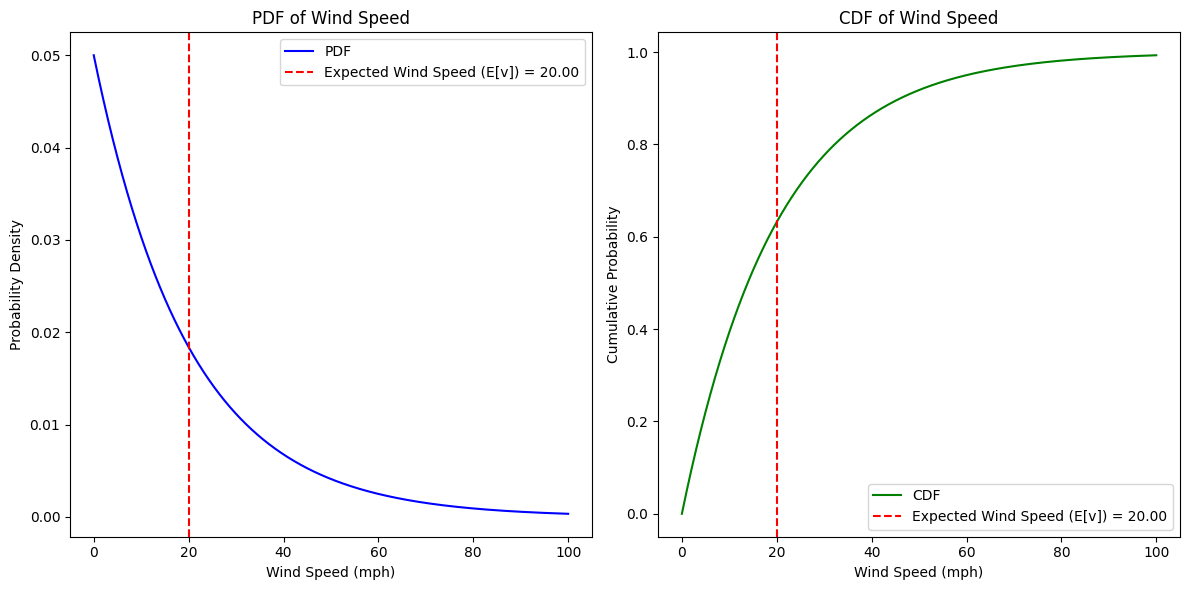

In [7]:

v_values = np.linspace(0, 100, 1000)
pdf_values = dist.pdf(v_values)
cdf_values = dist.cdf(v_values)
#PDf
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(v_values, pdf_values, label='PDF', color='blue')
plt.axvline(E_v, color='red', linestyle='--', label=f'Expected Wind Speed (E[v]) = {E_v:.2f}')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Probability Density')
plt.title('PDF of Wind Speed')
plt.legend()

# CDF
plt.subplot(1, 2, 2)
plt.plot(v_values, cdf_values, label='CDF', color='green')
plt.axvline(E_v, color='red', linestyle='--', label=f'Expected Wind Speed (E[v]) = {E_v:.2f}')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Wind Speed')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:

print(E_P_v,'KW')
print(E_v,'MPH')
print(P_E_v)

63.91954591455778 KW
20.0 MPH
0.36787944117144233
